In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r"PowerNetworks.csv",index_col = 'LCLid')
df.head()

list_col = ['stdorToU','Acorn','Acorn_grouped','DateTime'] #mentined unwanted data to removed
df.drop(list_col,axis = 1,inplace = True)  #deleting remaining coloumns


In [3]:
# .Find top 3 power consuming house ids by group func.
df['KWh'] = pd.to_numeric(df['KWh'],downcast = 'float',errors = 'coerce')
house = df.groupby('LCLid').sum()

In [4]:

house = house.sort_values('KWh',ascending = False,kind = 'qiucksort',na_position = 'last')
house = house.head(3)
house.index

Index(['MAC000034', 'MAC000035', 'MAC000021'], dtype='object', name='LCLid')

In [5]:
#Grouping Top three households recorded data individually

top =[]
for i in range(3):
    top.append(df.loc[house.iloc[i].name])
    id_count = top[i]['KWh'].count()
    top[i]['DateTime'] = pd.date_range('2017-01-01',periods = id_count,freq = '0.5H')
    top[i].set_index('DateTime',inplace = True)
    top[i] = top[i].resample('D').sum()
    

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
from pmdarima import auto_arima

house id =  0
house id =  1
house id =  2


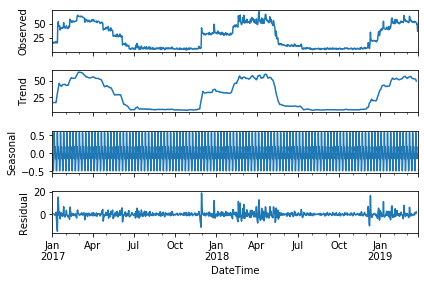

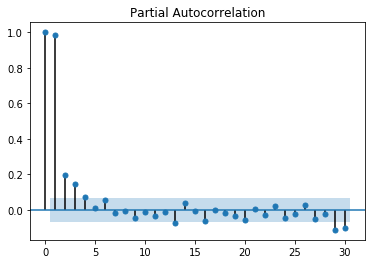

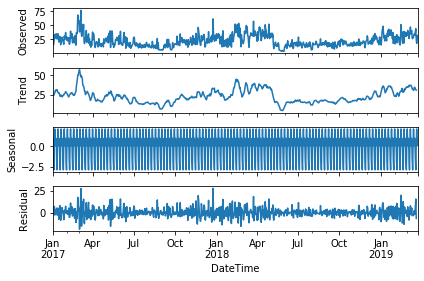

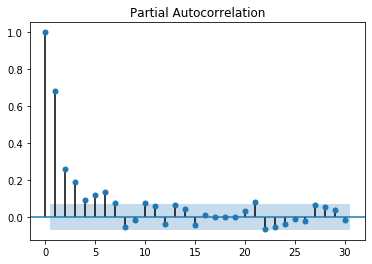

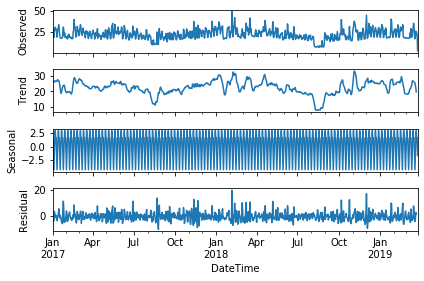

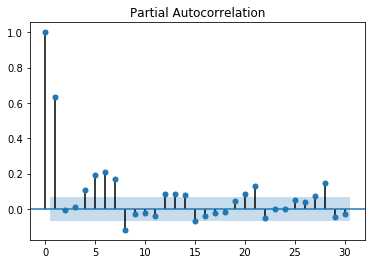

In [9]:
for i in range(3):  
    print("house id = ",i)
    result = seasonal_decompose(top[i]['KWh'])
    result.plot();
    plot_pacf(top[i]['KWh']);

# ........... Dicky fuller test......

In [10]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [11]:
for i in range(3):
    print('id:',i)
    adf_test(top[i]['KWh'])

id: 0
Augmented Dickey-Fuller Test: 
ADF test statistic       -1.624969
p-value                   0.470125
# lags used               3.000000
# observations          810.000000
critical value (1%)      -3.438449
critical value (5%)      -2.865115
critical value (10%)     -2.568674
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
id: 1
Augmented Dickey-Fuller Test: 
ADF test statistic       -3.278285
p-value                   0.015877
# lags used              13.000000
# observations          799.000000
critical value (1%)      -3.438561
critical value (5%)      -2.865164
critical value (10%)     -2.568700
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
id: 2
Augmented Dickey-Fuller Test: 
ADF test statistic       -3.369458
p-value                   0.012045
# lags used              21.000000
# observations          793.000000
critical value (1%)      -3.

In [16]:

''''
plot_acf(top[0]['KWh']);
plot_acf(top[1]['KWh']);
plot_acf(top[2]['KWh']);
'''''

"'\nplot_acf(top[0]['KWh']);\nplot_acf(top[1]['KWh']);\nplot_acf(top[2]['KWh']);\n"

#  Choosing p,d,q parameters for ARIMA

In [17]:
    print(auto_arima(top[2]['KWh'],seasonal = True,m=12).summary())

F:\jupyter_book\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  815
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2395.160
Date:                Mon, 14 Oct 2019   AIC                           4796.321
Time:                        15:09:07   BIC                           4810.430
Sample:                             0   HQIC                          4801.736
                                - 815                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.9847      0.590     13.542      0.000       6.829       9.140
ar.L1          0.6445      0.023     28.099      0.000       0.600       0.689
sigma2        20.8877      0.788     26.524      0.0

In [19]:
for i in range(3):
    print(auto_arima(top[i]['KWh'],seasonal = False,trace = True,m=12).summary())

Fit ARIMA: order=(2, 1, 2); AIC=4358.540, BIC=4386.744, Fit time=1.861 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4415.493, BIC=4424.894, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4383.782, BIC=4397.885, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4371.012, BIC=4385.114, Fit time=0.060 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4363.801, BIC=4387.305, Fit time=0.521 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4362.293, BIC=4395.198, Fit time=2.454 seconds
Fit ARIMA: order=(2, 1, 1); AIC=4363.699, BIC=4387.202, Fit time=0.648 seconds


F:\jupyter_book\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 3); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=4362.747, BIC=4381.550, Fit time=0.713 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4366.707, BIC=4404.313, Fit time=3.852 seconds
Total fit time: 10.431 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  813
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2173.270
Method:                       css-mle   S.D. of innovations              3.504
Date:                Mon, 14 Oct 2019   AIC                           4358.540
Time:                        15:09:35   BIC                           4386.744
Sample:                             1   HQIC                          4369.366
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

F:\jupyter_book\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(4, 0, 4); AIC=4644.950, BIC=4691.982, Fit time=27.184 seconds
Fit ARIMA: order=(3, 0, 4); AIC=4644.492, BIC=4686.820, Fit time=34.045 seconds


F:\jupyter_book\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 0, 5); AIC=4644.714, BIC=4691.746, Fit time=73.916 seconds
Fit ARIMA: order=(2, 0, 3); AIC=4761.383, BIC=4794.305, Fit time=1.475 seconds
Fit ARIMA: order=(4, 0, 5); AIC=4648.042, BIC=4699.777, Fit time=51.028 seconds
Fit ARIMA: order=(2, 0, 4); AIC=4760.122, BIC=4797.748, Fit time=2.138 seconds
Total fit time: 212.824 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  815
Model:                     ARMA(3, 4)   Log Likelihood               -2313.246
Method:                       css-mle   S.D. of innovations              4.112
Date:                Mon, 14 Oct 2019   AIC                           4644.492
Time:                        15:13:14   BIC                           4686.820
Sample:                             0   HQIC                          4660.738
                                                                              
                 c

F:\jupyter_book\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
F:\jupyter_book\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
F:\jupyter_book\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
F:\jupyter_book\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [20]:
def Eval_arima(top,model = 'A'):
    print('len = ',len(top))
    count = top['KWh'].count()
    tr = int(0.9*count)
    
    #................Train data...........
    print('train len:',tr)
    train = top.iloc[:tr]
     
    #................Test data................
    test = top.iloc[tr:]
    
   
    # ....Training the model...Arima model..
    if model == 'A' or model == 'a':
        model  = ARIMA(train['KWh'],order = (1,0,2))
        print('ARIMA')
        results = model.fit() 
    elif model == 's' or model == 'S':
        print('SARIMAX')
        model  = SARIMAX(train['KWh'],m=12,order = (3,0,4),seasonal_order=(0,0,0,12))
        results = model.fit()
    
    
    
    
    start = len(train)
    end = len(train) + len(test) - 1
        
    
    #...    Forecast data using the trained model
    predictions = results.predict(start,end,typ = 'levels').rename('predictions')
    print('predicted values: ',predictions[:4])
    #plotting Graph Test data vs Predicted data
    test['KWh'].plot(legend = True,figsize = (12,8))
    predictions.plot(legend=True);
    
    

len =  815
train len: 733
SARIMAX


F:\jupyter_book\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted values:  2019-01-04    25.344472
2019-01-05    27.209434
2019-01-06    27.605576
2019-01-07    25.881914
Freq: D, Name: predictions, dtype: float64


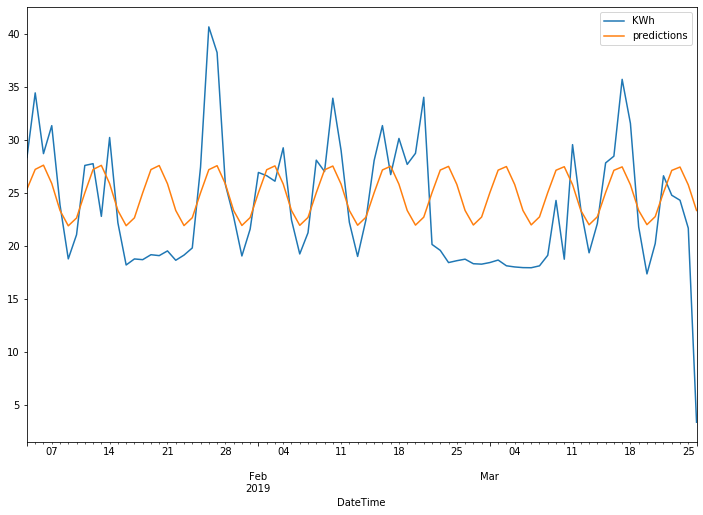

In [21]:
Eval_arima(top[2],'S')